This notebook implements a simple 1-layer neural network (also known as a shallow neural network) with one hidden layer for binary classification. Below are the key components and equations that define the model.

## Data Generation
We generate synthetic data for binary classification:
- **Features**: \( X \in \mathbb{R}^{2 \times m} \), where 2 is the number of features and \( m = 400 \) is the number of samples.
- **Labels**: \( y = \begin{cases} 1 & \text{if } X_1 + X_2 > 0 \\ 0 & \text{otherwise} \end{cases} \), reshaped to \( y \in \mathbb{R}^{1 \times m} \).



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(2, 400)  # 2 features, 400 samples
y = np.where(X[0, :] + X[1, :] > 0, 1, 0).reshape(1, 400)  # Binary classification

ModuleNotFoundError: No module named 'numpy'

## Sigmoid Activation
The sigmoid function is used in the output layer for binary classification:
\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]
- **Input**: \( z \), the linear combination of inputs and weights.
- **Output**: A value between 0 and 1, representing the probability of the positive class.

In [29]:
# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Parameter Initialization
Initialize the weights and biases for the hidden layer:
- **Weights**: \( W_1 \in \mathbb{R}^{n_h \times n_x} \), randomly initialized with small values (\( \times 0.01 \)).
- **Bias**: \( b_1 \in \mathbb{R}^{n_h \times 1} \), initialized to zeros.
- Here, \( n_x = 2 \) (input features), and \( n_h = 4 \) (hidden units).


In [30]:
# Initialize parameters
def initialize_parameters(n_x, n_h):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    return W1, b1

## Forward Propagation
Compute the output of the single hidden layer:
\[
Z_1 = W_1 X + b_1
\]
\[
A_1 = \sigma(Z_1)
\]
- **\( Z_1 \)**: Linear transformation of the inputs.
- **\( A_1 \)**: Activated output, which predicts the class probabilities.


In [31]:
# Forward propagation
def forward_propagation(X, W1, b1):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    return A1

## Cost Function
The binary cross-entropy loss measures the model's performance:
\[
J = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(A_1^{(i)}) + (1 - y^{(i)}) \log(1 - A_1^{(i)}) \right]
\]
- **\( y \)**: True labels.
- **\( A_1 \)**: Predicted probabilities.
- **\( m \)**: Number of samples.


In [32]:
# Compute cost
def compute_cost(A1, y):
    m = y.shape[1]
    cost = -np.sum(y * np.log(A1) + (1 - y) * np.log(1 - A1)) / m
    return cost

## Backward Propagation
Compute the gradients for parameter updates:
\[
dZ_1 = A_1 - y
\]
\[
dW_1 = \frac{1}{m} dZ_1 X^T
\]
\[
db_1 = \frac{1}{m} \sum_{i=1}^m dZ_1^{(i)}
\]
- **\( dZ_1 \)**: Error at the output layer.
- **\( dW_1, db_1 \)**: Gradients for the weights and bias.

In [33]:
# Backward propagation
def backward_propagation(X, y, A1):
    m = X.shape[1]
    dZ1 = A1 - y
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1

## Parameter Update
Update the weights and biases using gradient descent:
\[
W_1 = W_1 - \alpha dW_1
\]
\[
b_1 = b_1 - \alpha db_1
\]
- **\( \alpha \)**: Learning rate (e.g., 0.01).

In [34]:
# Update parameters
def update_parameters(W1, b1, dW1, db1, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    return W1, b1


## Training the Model
The model is trained by iteratively performing forward propagation, computing the cost, performing backward propagation, and updating the parameters for a specified number of epochs.

In [35]:
# Train 1-layer DNN
def train_one_layer(X, y, n_h, learning_rate=0.01, epochs=2000):
    n_x = X.shape[0]
    W1, b1 = initialize_parameters(n_x, n_h)
    costs = []
    
    for i in range(epochs):
        A1 = forward_propagation(X, W1, b1)
        cost = compute_cost(A1, y)
        dW1, db1 = backward_propagation(X, y, A1)
        W1, b1 = update_parameters(W1, b1, dW1, db1, learning_rate)
        
        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")
    
    return W1, b1, costs

## Cost Reduction Plot
After training, a plot of the cost over iterations is displayed to visualize the model's learning progress.

Cost after iteration 0: 2.7752903039013024
Cost after iteration 100: 2.334827665123542
Cost after iteration 200: 2.0396175830987864
Cost after iteration 300: 1.8310731364994917
Cost after iteration 400: 1.6761271248577227
Cost after iteration 500: 1.5561518545354662
Cost after iteration 600: 1.4601628485317872
Cost after iteration 700: 1.3813371742057279
Cost after iteration 800: 1.3152309954016956
Cost after iteration 900: 1.2588291421013453
Cost after iteration 1000: 1.2100133469635177
Cost after iteration 1100: 1.1672507055550942
Cost after iteration 1200: 1.1294034255425192
Cost after iteration 1300: 1.0956083080100054
Cost after iteration 1400: 1.065197903692232
Cost after iteration 1500: 1.037647451117695
Cost after iteration 1600: 1.0125382615906993
Cost after iteration 1700: 0.9895318863455036
Cost after iteration 1800: 0.9683515265930848
Cost after iteration 1900: 0.9487684163609831


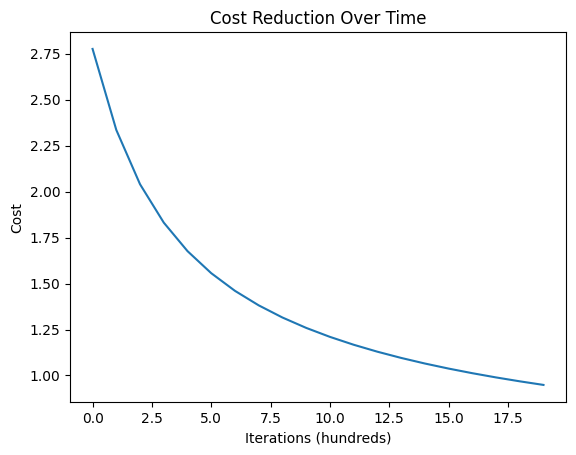

In [36]:
# Run the model
n_h = 4  # 4 hidden units
W1, b1, costs = train_one_layer(X, y, n_h)
plt.plot(costs)
plt.xlabel('Iterations (hundreds)')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Time')
plt.show()